### Importando bibliotecas

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import os

In [95]:
import warnings
warnings.filterwarnings('ignore')

### Lendo e plotando os limites da área de estudo

In [96]:
boundary = gpd.read_file(r"C:\Users\gabri\Gawler Challenge 2020\Project Outline\GCAS_Boundary.shp")

Text(46.087764124572615, 0.5, 'LONGITUDE')

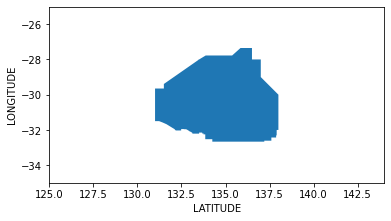

In [97]:
fig,ax = plt.subplots()
boundary.plot(ax=ax)
ax.set_xlim([125,144])
ax.set_ylim([-35,-25])
plt.xlabel("LATITUDE")
plt.ylabel("LONGITUDE")

### Particionando os dados para reduzir uso de memória

O banco de dados geoquímico tem mais de 10GB de tamanho. Para ser possível visualizá-lo e manipulá-lo, dividiu-se o mesmo em arquivos menores de 200.000 linhas cada (aproximadamente 150 MB), lendo cada um em um dataframe.

In [6]:
#chunk_size = 200000
#batch_no = 1
#for chunk in pd.read_csv("sarig_rs_chem_exp.csv",chunksize=chunk_size):
#    chunk.to_csv("sarig_rs_chem_exp" + str(batch_no) + ".csv",index=False)
#    batch_no +=1

### Convertendo os dataframes em geodataframes

A conversão feita via biblioteca geopandas tem o intuito de tornar possível espacializar os dados. Para evitar "memory error", o processo foi feito através de for looping indexando listas de 15 elementos.

In [98]:
chem = []
for i in range(1,16):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

Checando as colunas e primeira linha da primeira tabela da iteração

In [99]:
chem[0].head(1)

,SAMPLE_NO,SAMPLE_SOURCE_CODE,SAMPLE_SOURCE,ROCK_GROUP_CODE,ROCK_GROUP,LITHO_CODE,LITHO_CONF,LITHOLOGY_NAME,LITHO_MODIFIER,MAP_SYMBOL,...,SAMPLE_ANALYSIS_NO,OTHER_ANALYSIS_ID,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,CHEM_METHOD_DESC,geometry
0,589,RO,Rock outcrop / float,SSA,Sediment Siliciclastic Arenite,SDST,NaN,Sandstone,NaN,NaN,...,158,NaN,GEOCHEMISTRY,NaN,Ti,0.15,%,AES,AES,POINT (129.13719 -27.06977)


Confirmando o tipo de dado gerado

In [100]:
type(chem[1])

geopandas.geodataframe.GeoDataFrame

Plotando a primeira tabela de pontos iterada conjuntamente com os limites da área de estudo

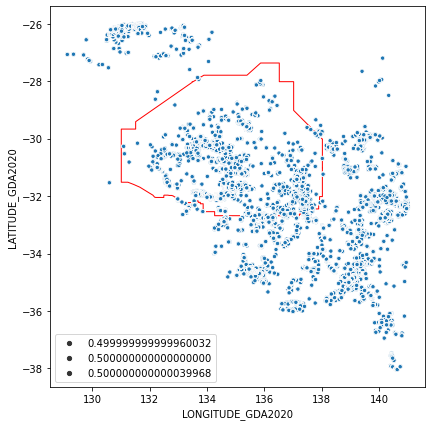

In [101]:
fig,ax = plt.subplots(figsize=[15,7])
boundary.plot(ax=ax,facecolor="white",edgecolor="red")
sns.scatterplot(data=chem[0],x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",ax=ax,size=0.5)

Aplicando a ferramenta clip e plotando os pontos de dados que estão dentro do polígono de estudo 

In [103]:
chem1 = gpd.clip(chem[0],boundary)

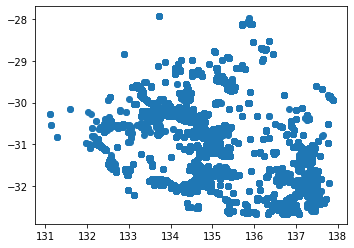

In [104]:
chem1.plot()

Checando as informações da primeira tabela clipada. Dos 200000 pontos de dados iniciais desta tabela, apenas 67733 estavam dentro da área de estudo

In [105]:
chem1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 67733 entries, 14 to 199023
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SAMPLE_NO           67733 non-null  int64   
 1   SAMPLE_SOURCE_CODE  67524 non-null  object  
 2   SAMPLE_SOURCE       67524 non-null  object  
 3   ROCK_GROUP_CODE     57279 non-null  object  
 4   ROCK_GROUP          57279 non-null  object  
 5   LITHO_CODE          57279 non-null  object  
 6   LITHO_CONF          2238 non-null   object  
 7   LITHOLOGY_NAME      57279 non-null  object  
 8   LITHO_MODIFIER      16756 non-null  object  
 9   MAP_SYMBOL          46854 non-null  object  
 10  STRAT_CONF          5231 non-null   object  
 11  STRAT_NAME          47151 non-null  object  
 12  COLLECTED_BY        63840 non-null  object  
 13  COLLECTORS_NUMBER   32448 non-null  object  
 14  COLLECTED_DATE      26750 non-null  object  
 15  DRILLHOLE_NUMBER    46122 

##### Operação de clip nas demais tabelas (geodataframes) constantes na lista (vetor) criada pela primeira iteração

In [106]:
chem2 = gpd.clip(chem[1],boundary)
chem3 = gpd.clip(chem[2],boundary)
chem4 = gpd.clip(chem[3],boundary)
chem5 = gpd.clip(chem[4],boundary)
chem6 = gpd.clip(chem[5],boundary)
chem7 = gpd.clip(chem[6],boundary)
chem8 = gpd.clip(chem[7],boundary)
chem9 = gpd.clip(chem[8],boundary)
chem10 = gpd.clip(chem[9],boundary)
chem11 = gpd.clip(chem[10],boundary)
chem12 = gpd.clip(chem[11],boundary)
chem13 = gpd.clip(chem[12],boundary)
chem14 = gpd.clip(chem[13],boundary)
chem15 = gpd.clip(chem[14],boundary)

Checando os elementos constantes em uma das tabelas da primeira lista

In [107]:
print(chem6["CHEM_CODE"].unique())
print("\n")
print(chem6["CHEM_CODE"].nunique())

['Ce' 'La' 'Th' 'U' 'Au' 'Ag' 'As' 'Bi' 'Cd' 'Co' 'Cs' 'Cu' 'Ga' 'In' 'Mo'
 'Ni' 'Pb' 'Sb' 'Se' 'Te' 'Tl' 'W' 'Zn' 'Cr' 'Pd' 'TiO2' 'P2O5' 'SiO2'
 'Al2O3' 'Fe' 'Mn' 'V2O5' 'Sr' 'Ba' 'U3O8' 'ThO2' 'Sn' 'WO3' 'Ta2O5'
 'Nb2O5' 'Zr' 'Rb' 'Y' 'K' 'Ca' 'F' 'Mg' 'Na' 'Pt' 'CaO' 'K2O' 'LOI' 'MgO'
 'MnO' 'Na2O' 'Fe2O3' 'Nb' 'Dy' 'Er' 'Eu' 'Gd' 'Hf' 'Ho' 'Lu' 'Nd' 'Pr'
 'Sm' 'Ta' 'Tb' 'Tm' 'V' 'Yb' 'P' 'S' 'Ti' 'Ge' 'Be']


77


#### Plotando as tabelas de 1 a 15 contra os limites da área de estudo

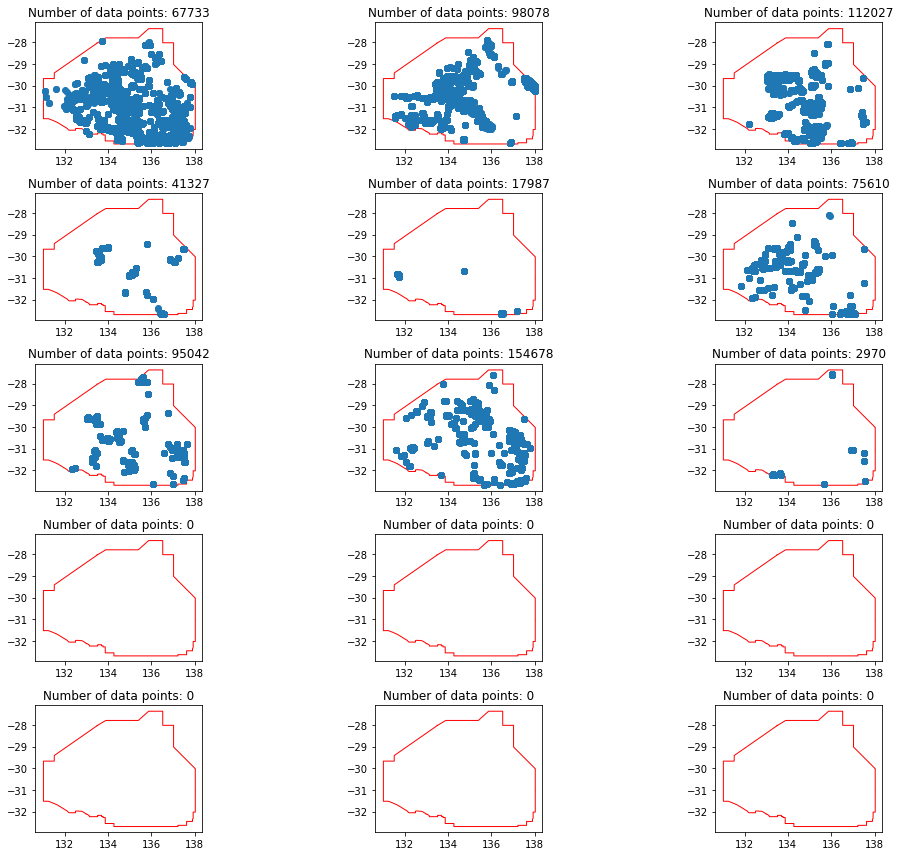

In [114]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem1.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem1["SAMPLE_NO"].count()))
chem2.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem2["SAMPLE_NO"].count()))
chem3.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem3["SAMPLE_NO"].count()))
chem4.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem4["SAMPLE_NO"].count()))
chem5.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem5["SAMPLE_NO"].count()))
chem6.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem6["SAMPLE_NO"].count()))
chem7.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem7["SAMPLE_NO"].count()))
chem8.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem8["SAMPLE_NO"].count()))
chem9.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem9["SAMPLE_NO"].count()))
chem10.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem10["SAMPLE_NO"].count()))
chem11.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem11["SAMPLE_NO"].count()))
chem12.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem12["SAMPLE_NO"].count()))
chem13.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem13["SAMPLE_NO"].count()))
chem14.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem14["SAMPLE_NO"].count()))
chem15.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem15["SAMPLE_NO"].count()))
plt.tight_layout()

### Repetindo o processo no restante do banco de dados

* Ler 15 csv's em uma lista iterada via for looping
* Clipar cada uma dos conjuntos de pontos de dados pelos limites da área de estudo
* Plotando os pontos remanescentes de cada tabela dentro da poligonal (no título de cada plot tem o número de pontos contidos dos 200000 iniciais)

In [115]:
chem = []
for i in range(16,31):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [116]:
chem16 = gpd.clip(chem[0],boundary)
chem17 = gpd.clip(chem[1],boundary)
chem18 = gpd.clip(chem[2],boundary)
chem19 = gpd.clip(chem[3],boundary)
chem20 = gpd.clip(chem[4],boundary)
chem21 = gpd.clip(chem[5],boundary)
chem22 = gpd.clip(chem[6],boundary)
chem23 = gpd.clip(chem[7],boundary)
chem24 = gpd.clip(chem[8],boundary)
chem25 = gpd.clip(chem[9],boundary)
chem26 = gpd.clip(chem[10],boundary)
chem27 = gpd.clip(chem[11],boundary)
chem28 = gpd.clip(chem[12],boundary)
chem29 = gpd.clip(chem[13],boundary)
chem30 = gpd.clip(chem[14],boundary)

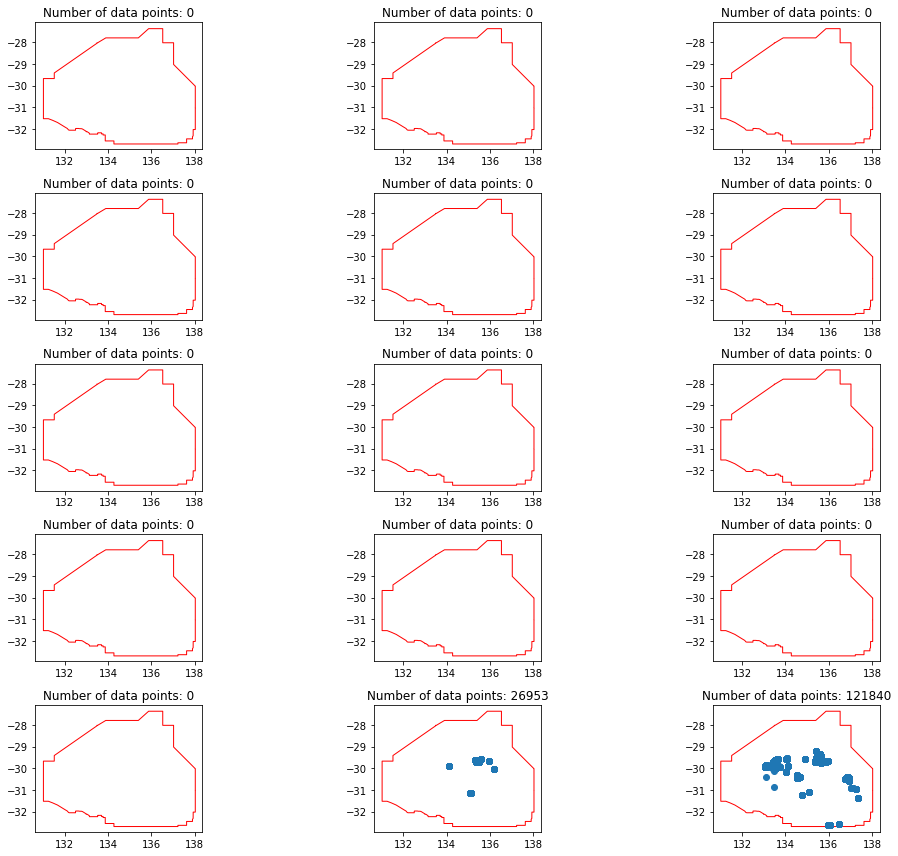

In [117]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem16.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem16["SAMPLE_NO"].count()))
chem17.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem17["SAMPLE_NO"].count()))
chem18.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem18["SAMPLE_NO"].count()))
chem19.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem19["SAMPLE_NO"].count()))
chem20.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem20["SAMPLE_NO"].count()))
chem21.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem21["SAMPLE_NO"].count()))
chem22.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem22["SAMPLE_NO"].count()))
chem23.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem23["SAMPLE_NO"].count()))
chem24.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem24["SAMPLE_NO"].count()))
chem25.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem25["SAMPLE_NO"].count()))
chem26.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem26["SAMPLE_NO"].count()))
chem27.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem27["SAMPLE_NO"].count()))
chem28.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem28["SAMPLE_NO"].count()))
chem29.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem29["SAMPLE_NO"].count()))
chem30.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem30["SAMPLE_NO"].count()))
plt.tight_layout()

In [118]:
chem = []
for i in range(31,46):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [119]:
chem31 = gpd.clip(chem[0],boundary)
chem32 = gpd.clip(chem[1],boundary)
chem33 = gpd.clip(chem[2],boundary)
chem34 = gpd.clip(chem[3],boundary)
chem35 = gpd.clip(chem[4],boundary)
chem36 = gpd.clip(chem[5],boundary)
chem37 = gpd.clip(chem[6],boundary)
chem38 = gpd.clip(chem[7],boundary)
chem39 = gpd.clip(chem[8],boundary)
chem40 = gpd.clip(chem[9],boundary)
chem41 = gpd.clip(chem[10],boundary)
chem42 = gpd.clip(chem[11],boundary)
chem43 = gpd.clip(chem[12],boundary)
chem44 = gpd.clip(chem[13],boundary)
chem45 = gpd.clip(chem[14],boundary)

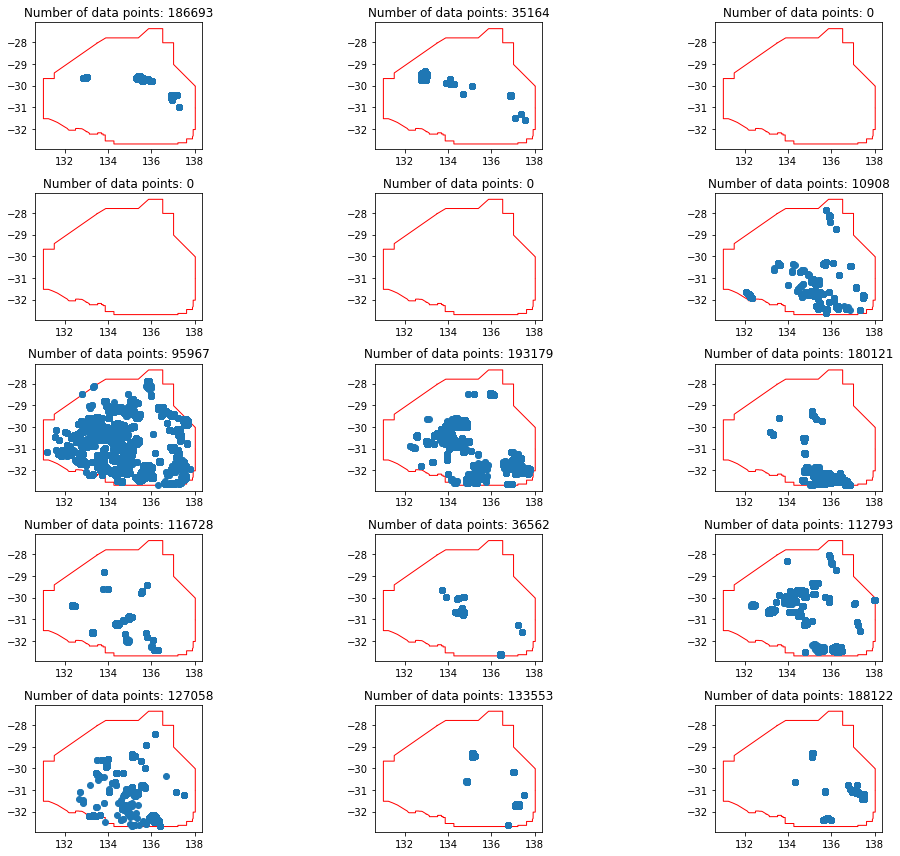

In [120]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem31.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem31["SAMPLE_NO"].count()))
chem32.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem32["SAMPLE_NO"].count()))
chem33.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem33["SAMPLE_NO"].count()))
chem34.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem34["SAMPLE_NO"].count()))
chem35.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem35["SAMPLE_NO"].count()))
chem36.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem36["SAMPLE_NO"].count()))
chem37.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem37["SAMPLE_NO"].count()))
chem38.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem38["SAMPLE_NO"].count()))
chem39.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem39["SAMPLE_NO"].count()))
chem40.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem40["SAMPLE_NO"].count()))
chem41.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem41["SAMPLE_NO"].count()))
chem42.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem42["SAMPLE_NO"].count()))
chem43.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem43["SAMPLE_NO"].count()))
chem44.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem44["SAMPLE_NO"].count()))
chem45.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem45["SAMPLE_NO"].count()))
plt.tight_layout()

In [121]:
chem = []
for i in range(46,61):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [122]:
chem46 = gpd.clip(chem[0],boundary)
chem47 = gpd.clip(chem[1],boundary)
chem48 = gpd.clip(chem[2],boundary)
chem49 = gpd.clip(chem[3],boundary)
chem50 = gpd.clip(chem[4],boundary)
chem51 = gpd.clip(chem[5],boundary)
chem52 = gpd.clip(chem[6],boundary)
chem53 = gpd.clip(chem[7],boundary)
chem54 = gpd.clip(chem[8],boundary)
chem55 = gpd.clip(chem[9],boundary)
chem56 = gpd.clip(chem[10],boundary)
chem57 = gpd.clip(chem[11],boundary)
chem58 = gpd.clip(chem[12],boundary)
chem59 = gpd.clip(chem[13],boundary)
chem60 = gpd.clip(chem[14],boundary)

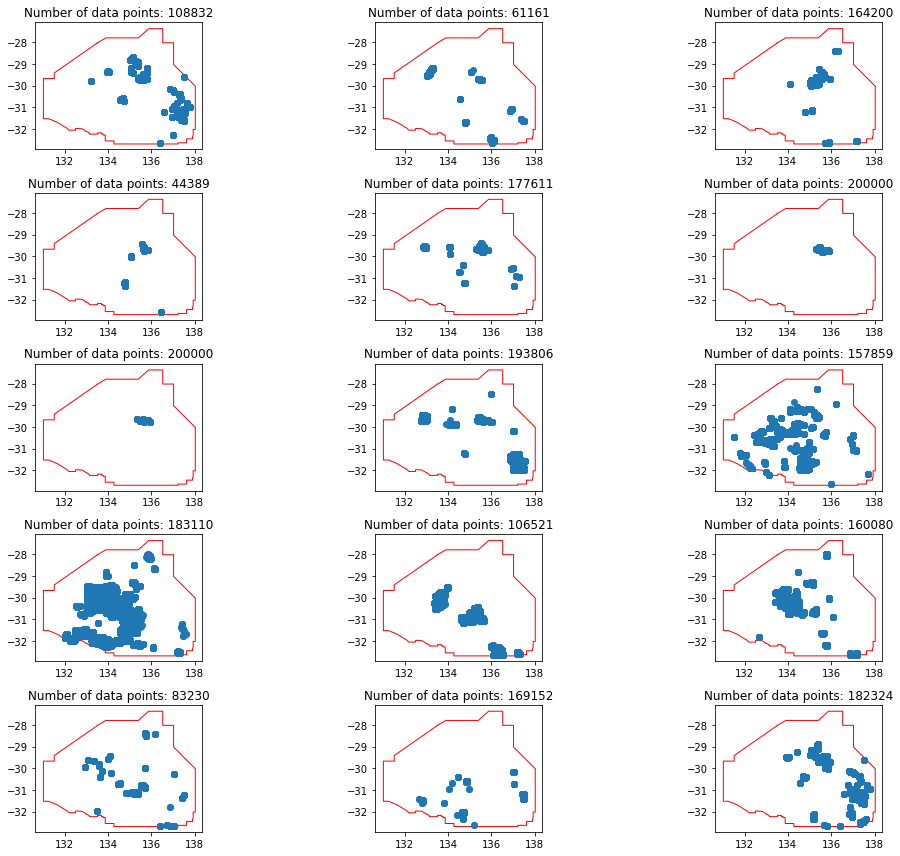

In [123]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem46.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem46["SAMPLE_NO"].count()))
chem47.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem47["SAMPLE_NO"].count()))
chem48.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem48["SAMPLE_NO"].count()))
chem49.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem49["SAMPLE_NO"].count()))
chem50.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem50["SAMPLE_NO"].count()))
chem51.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem51["SAMPLE_NO"].count()))
chem52.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem52["SAMPLE_NO"].count()))
chem53.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem53["SAMPLE_NO"].count()))
chem54.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem54["SAMPLE_NO"].count()))
chem55.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem55["SAMPLE_NO"].count()))
chem56.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem56["SAMPLE_NO"].count()))
chem57.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem57["SAMPLE_NO"].count()))
chem58.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem58["SAMPLE_NO"].count()))
chem59.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem59["SAMPLE_NO"].count()))
chem60.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem60["SAMPLE_NO"].count()))
plt.tight_layout()

In [124]:
chem = []
for i in range(61,76):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [125]:
chem61 = gpd.clip(chem[0],boundary)
chem62 = gpd.clip(chem[1],boundary)
chem63 = gpd.clip(chem[2],boundary)
chem64 = gpd.clip(chem[3],boundary)
chem65 = gpd.clip(chem[4],boundary)
chem66 = gpd.clip(chem[5],boundary)
chem67 = gpd.clip(chem[6],boundary)
chem68 = gpd.clip(chem[7],boundary)
chem69 = gpd.clip(chem[8],boundary)
chem70 = gpd.clip(chem[9],boundary)
chem71 = gpd.clip(chem[10],boundary)
chem72 = gpd.clip(chem[11],boundary)
chem73 = gpd.clip(chem[12],boundary)
chem74 = gpd.clip(chem[13],boundary)
chem75 = gpd.clip(chem[14],boundary)

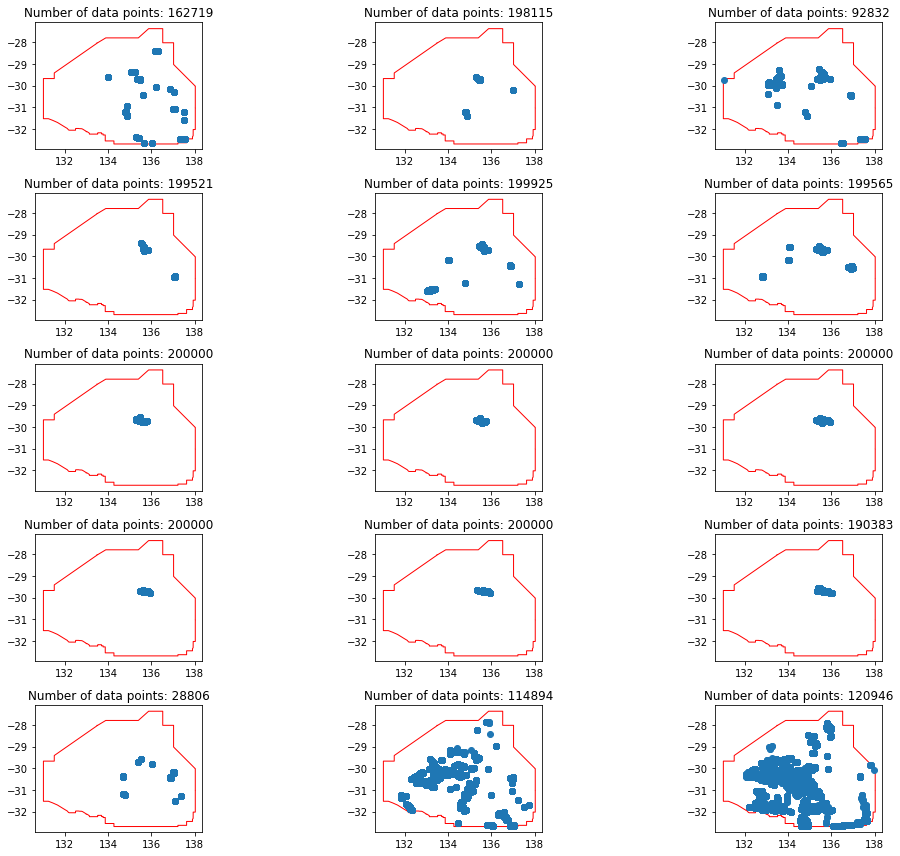

In [126]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem61.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem61["SAMPLE_NO"].count()))
chem62.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem62["SAMPLE_NO"].count()))
chem63.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem63["SAMPLE_NO"].count()))
chem64.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem64["SAMPLE_NO"].count()))
chem65.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem65["SAMPLE_NO"].count()))
chem66.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem66["SAMPLE_NO"].count()))
chem67.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem67["SAMPLE_NO"].count()))
chem68.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem68["SAMPLE_NO"].count()))
chem69.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem69["SAMPLE_NO"].count()))
chem70.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem70["SAMPLE_NO"].count()))
chem71.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem71["SAMPLE_NO"].count()))
chem72.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem72["SAMPLE_NO"].count()))
chem73.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem73["SAMPLE_NO"].count()))
chem74.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem74["SAMPLE_NO"].count()))
chem75.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem75["SAMPLE_NO"].count()))
plt.tight_layout()

In [127]:
chem = []
for i in range(76,91):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [128]:
chem76 = gpd.clip(chem[0],boundary)
chem77 = gpd.clip(chem[1],boundary)
chem78 = gpd.clip(chem[2],boundary)
chem79 = gpd.clip(chem[3],boundary)
chem80 = gpd.clip(chem[4],boundary)
chem81 = gpd.clip(chem[5],boundary)
chem82 = gpd.clip(chem[6],boundary)
chem83 = gpd.clip(chem[7],boundary)
chem84 = gpd.clip(chem[8],boundary)
chem85 = gpd.clip(chem[9],boundary)
chem86 = gpd.clip(chem[10],boundary)
chem87 = gpd.clip(chem[11],boundary)
chem88 = gpd.clip(chem[12],boundary)
chem89 = gpd.clip(chem[13],boundary)
chem90 = gpd.clip(chem[14],boundary)

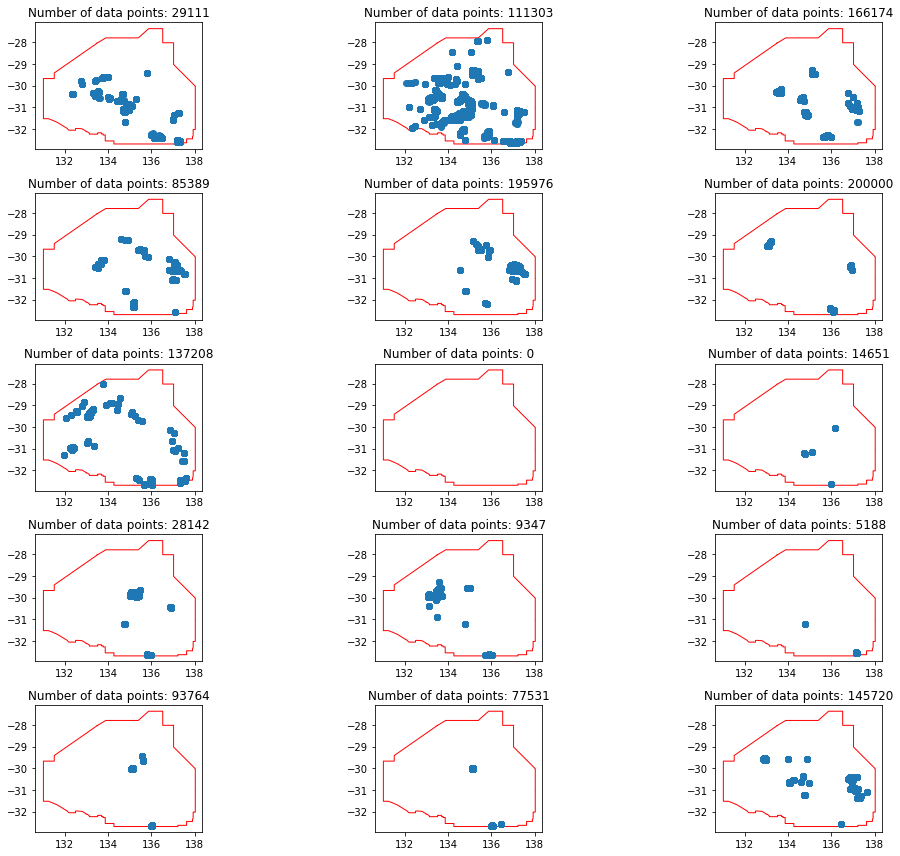

In [129]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem76.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem76["SAMPLE_NO"].count()))
chem77.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem77["SAMPLE_NO"].count()))
chem78.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem78["SAMPLE_NO"].count()))
chem79.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem79["SAMPLE_NO"].count()))
chem80.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem80["SAMPLE_NO"].count()))
chem81.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem81["SAMPLE_NO"].count()))
chem82.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem82["SAMPLE_NO"].count()))
chem83.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem83["SAMPLE_NO"].count()))
chem84.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem84["SAMPLE_NO"].count()))
chem85.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem85["SAMPLE_NO"].count()))
chem86.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem86["SAMPLE_NO"].count()))
chem87.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem87["SAMPLE_NO"].count()))
chem88.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem88["SAMPLE_NO"].count()))
chem89.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem89["SAMPLE_NO"].count()))
chem90.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem90["SAMPLE_NO"].count()))
plt.tight_layout()

In [130]:
chem = []
for i in range(91,106):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [131]:
chem91 = gpd.clip(chem[0],boundary)
chem92 = gpd.clip(chem[1],boundary)
chem93 = gpd.clip(chem[2],boundary)
chem94 = gpd.clip(chem[3],boundary)
chem95 = gpd.clip(chem[4],boundary)
chem96 = gpd.clip(chem[5],boundary)
chem97 = gpd.clip(chem[6],boundary)
chem98 = gpd.clip(chem[7],boundary)
chem99 = gpd.clip(chem[8],boundary)
chem100 = gpd.clip(chem[9],boundary)
chem101 = gpd.clip(chem[10],boundary)
chem102 = gpd.clip(chem[11],boundary)
chem103 = gpd.clip(chem[12],boundary)
chem104 = gpd.clip(chem[13],boundary)
chem105 = gpd.clip(chem[14],boundary)

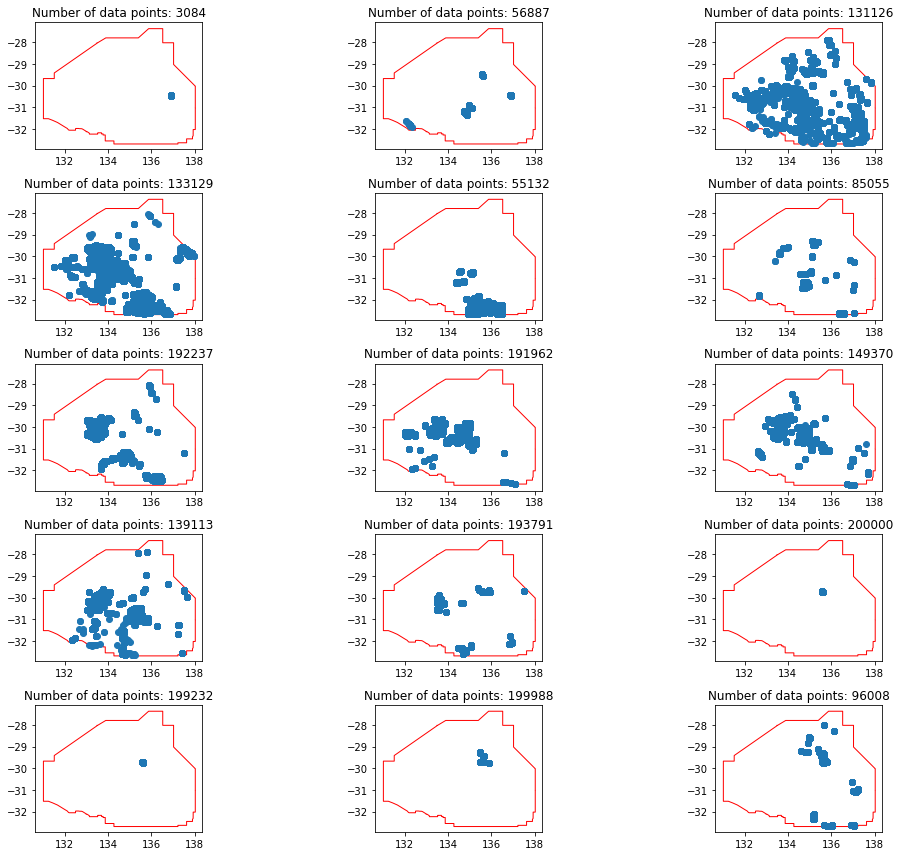

In [132]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem91.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem91["SAMPLE_NO"].count()))
chem92.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem92["SAMPLE_NO"].count()))
chem93.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem93["SAMPLE_NO"].count()))
chem94.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem94["SAMPLE_NO"].count()))
chem95.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem95["SAMPLE_NO"].count()))
chem96.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem96["SAMPLE_NO"].count()))
chem97.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem97["SAMPLE_NO"].count()))
chem98.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem98["SAMPLE_NO"].count()))
chem99.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem99["SAMPLE_NO"].count()))
chem100.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem100["SAMPLE_NO"].count()))
chem101.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem101["SAMPLE_NO"].count()))
chem102.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem102["SAMPLE_NO"].count()))
chem103.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem103["SAMPLE_NO"].count()))
chem104.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem104["SAMPLE_NO"].count()))
chem105.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem105["SAMPLE_NO"].count()))
plt.tight_layout()

In [133]:
chem = []
for i in range(106,121):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [134]:
chem106 = gpd.clip(chem[0],boundary)
chem107 = gpd.clip(chem[1],boundary)
chem108 = gpd.clip(chem[2],boundary)
chem109 = gpd.clip(chem[3],boundary)
chem110 = gpd.clip(chem[4],boundary)
chem111 = gpd.clip(chem[5],boundary)
chem112 = gpd.clip(chem[6],boundary)
chem113 = gpd.clip(chem[7],boundary)
chem114 = gpd.clip(chem[8],boundary)
chem115 = gpd.clip(chem[9],boundary)
chem116 = gpd.clip(chem[10],boundary)
chem117 = gpd.clip(chem[11],boundary)
chem118 = gpd.clip(chem[12],boundary)
chem119 = gpd.clip(chem[13],boundary)
chem120 = gpd.clip(chem[14],boundary)

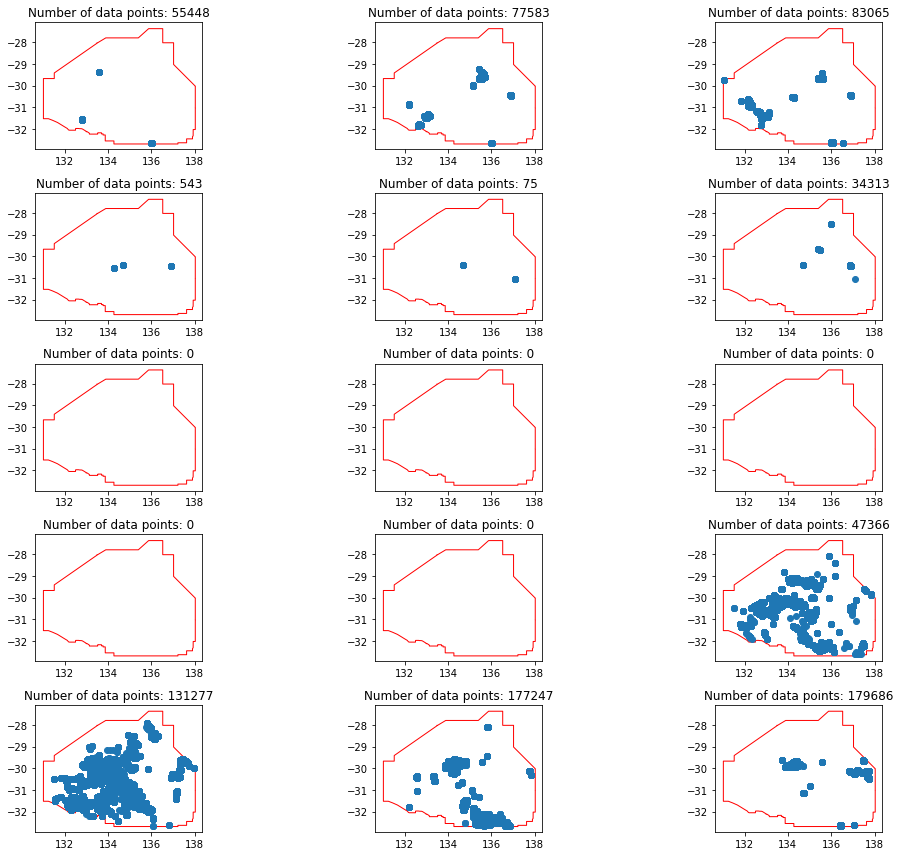

In [135]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem106.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem106["SAMPLE_NO"].count()))
chem107.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem107["SAMPLE_NO"].count()))
chem108.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem108["SAMPLE_NO"].count()))
chem109.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem109["SAMPLE_NO"].count()))
chem110.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem110["SAMPLE_NO"].count()))
chem111.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem111["SAMPLE_NO"].count()))
chem112.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem112["SAMPLE_NO"].count()))
chem113.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem113["SAMPLE_NO"].count()))
chem114.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem114["SAMPLE_NO"].count()))
chem115.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem115["SAMPLE_NO"].count()))
chem116.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem116["SAMPLE_NO"].count()))
chem117.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem117["SAMPLE_NO"].count()))
chem118.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem118["SAMPLE_NO"].count()))
chem119.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem119["SAMPLE_NO"].count()))
chem120.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem120["SAMPLE_NO"].count()))
plt.tight_layout()

In [136]:
chem = []
for i in range(121,136):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [137]:
chem121 = gpd.clip(chem[0],boundary)
chem122 = gpd.clip(chem[1],boundary)
chem123 = gpd.clip(chem[2],boundary)
chem124 = gpd.clip(chem[3],boundary)
chem125 = gpd.clip(chem[4],boundary)
chem126 = gpd.clip(chem[5],boundary)
chem127 = gpd.clip(chem[6],boundary)
chem128 = gpd.clip(chem[7],boundary)
chem129 = gpd.clip(chem[8],boundary)
chem130 = gpd.clip(chem[9],boundary)
chem131 = gpd.clip(chem[10],boundary)
chem132 = gpd.clip(chem[11],boundary)
chem133 = gpd.clip(chem[12],boundary)
chem134 = gpd.clip(chem[13],boundary)
chem135 = gpd.clip(chem[14],boundary)

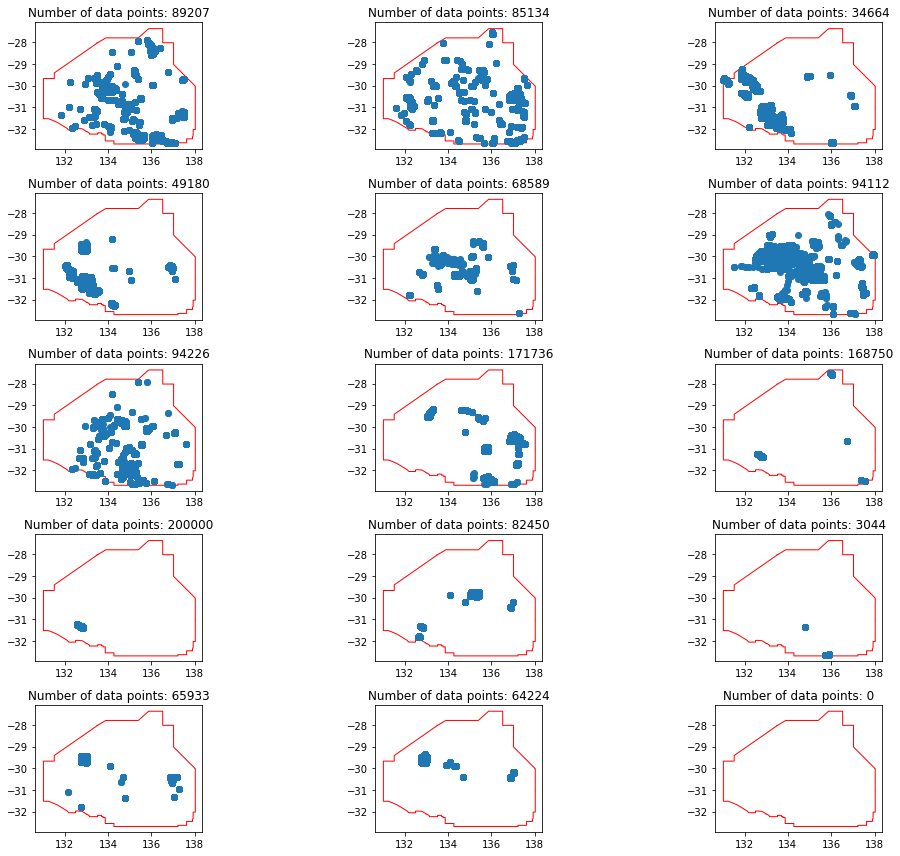

In [138]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem121.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem121["SAMPLE_NO"].count()))
chem122.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem122["SAMPLE_NO"].count()))
chem123.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem123["SAMPLE_NO"].count()))
chem124.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem124["SAMPLE_NO"].count()))
chem125.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem125["SAMPLE_NO"].count()))
chem126.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem126["SAMPLE_NO"].count()))
chem127.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem127["SAMPLE_NO"].count()))
chem128.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem128["SAMPLE_NO"].count()))
chem129.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem129["SAMPLE_NO"].count()))
chem130.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem130["SAMPLE_NO"].count()))
chem131.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem131["SAMPLE_NO"].count()))
chem132.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem132["SAMPLE_NO"].count()))
chem133.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem133["SAMPLE_NO"].count()))
chem134.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem134["SAMPLE_NO"].count()))
chem135.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem135["SAMPLE_NO"].count()))
plt.tight_layout()

In [139]:
chem = []
for i in range(136,151):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [140]:
chem136 = gpd.clip(chem[0],boundary)
chem137 = gpd.clip(chem[1],boundary)
chem138 = gpd.clip(chem[2],boundary)
chem139 = gpd.clip(chem[3],boundary)
chem140 = gpd.clip(chem[4],boundary)
chem141 = gpd.clip(chem[5],boundary)
chem142 = gpd.clip(chem[6],boundary)
chem143 = gpd.clip(chem[7],boundary)
chem144 = gpd.clip(chem[8],boundary)
chem145 = gpd.clip(chem[9],boundary)
chem146 = gpd.clip(chem[10],boundary)
chem147 = gpd.clip(chem[11],boundary)
chem148 = gpd.clip(chem[12],boundary)
chem149 = gpd.clip(chem[13],boundary)
chem150 = gpd.clip(chem[14],boundary)

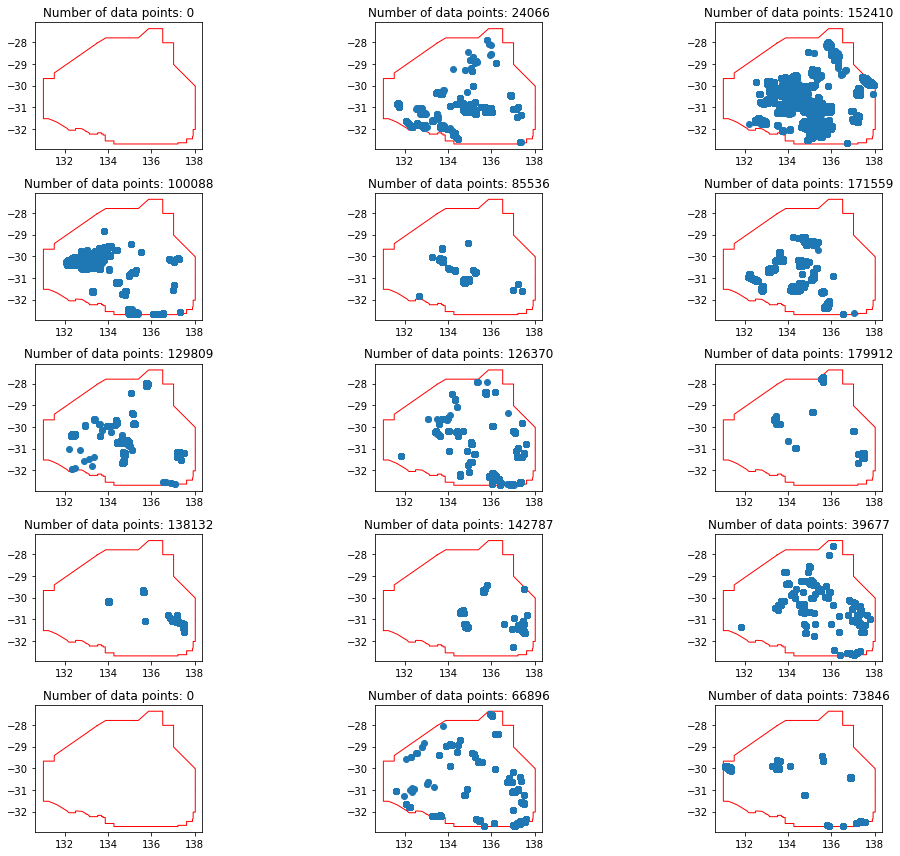

In [141]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=[15,12])
for x in range(0,5):
    for y in range(0,3):
        boundary.plot(ax=ax[x,y],facecolor="white",edgecolor="red")
chem136.plot(ax=ax[0,0])
ax[0,0].set_title("Number of data points: "+str(chem136["SAMPLE_NO"].count()))
chem137.plot(ax=ax[0,1])
ax[0,1].set_title("Number of data points: "+str(chem137["SAMPLE_NO"].count()))
chem138.plot(ax=ax[0,2])
ax[0,2].set_title("Number of data points: "+str(chem138["SAMPLE_NO"].count()))
chem139.plot(ax=ax[1,0])
ax[1,0].set_title("Number of data points: "+str(chem139["SAMPLE_NO"].count()))
chem140.plot(ax=ax[1,1])
ax[1,1].set_title("Number of data points: "+str(chem140["SAMPLE_NO"].count()))
chem141.plot(ax=ax[1,2])
ax[1,2].set_title("Number of data points: "+str(chem141["SAMPLE_NO"].count()))
chem142.plot(ax=ax[2,0])
ax[2,0].set_title("Number of data points: "+str(chem142["SAMPLE_NO"].count()))
chem143.plot(ax=ax[2,1])
ax[2,1].set_title("Number of data points: "+str(chem143["SAMPLE_NO"].count()))
chem144.plot(ax=ax[2,2])
ax[2,2].set_title("Number of data points: "+str(chem144["SAMPLE_NO"].count()))
chem145.plot(ax=ax[3,0])
ax[3,0].set_title("Number of data points: "+str(chem145["SAMPLE_NO"].count()))
chem146.plot(ax=ax[3,1])
ax[3,1].set_title("Number of data points: "+str(chem146["SAMPLE_NO"].count()))
chem147.plot(ax=ax[3,2])
ax[3,2].set_title("Number of data points: "+str(chem147["SAMPLE_NO"].count()))
chem148.plot(ax=ax[4,0])
ax[4,0].set_title("Number of data points: "+str(chem148["SAMPLE_NO"].count()))
chem149.plot(ax=ax[4,1])
ax[4,1].set_title("Number of data points: "+str(chem149["SAMPLE_NO"].count()))
chem150.plot(ax=ax[4,2])
ax[4,2].set_title("Number of data points: "+str(chem150["SAMPLE_NO"].count()))
plt.tight_layout()

In [142]:
chem = []
for i in range(151,154):
    c = pd.read_csv("sarig_rs_chem_exp"+str(i)+".csv")
    chem.append(gpd.GeoDataFrame(c, geometry=gpd.points_from_xy(x=c.LONGITUDE_GDA2020,y=c.LATITUDE_GDA2020)))

In [143]:
chem151 = gpd.clip(chem[0],boundary)
chem152 = gpd.clip(chem[1],boundary)
chem153 = gpd.clip(chem[2],boundary)

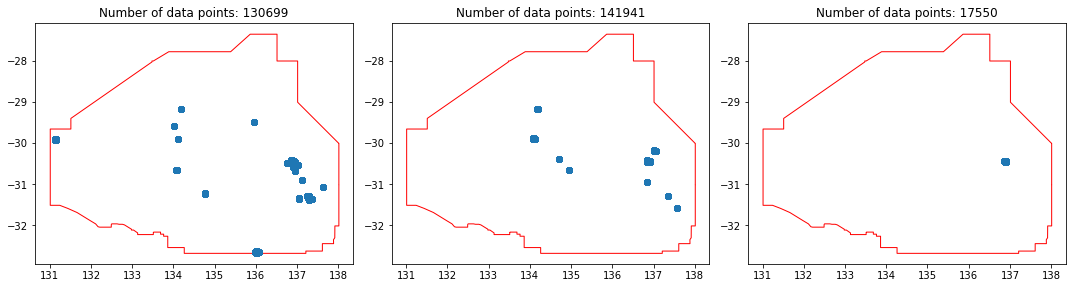

In [144]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=[15,12])
for x in range(0,3):
    boundary.plot(ax=ax[x],facecolor="white",edgecolor="red")
chem151.plot(ax=ax[0])
ax[0].set_title("Number of data points: "+str(chem151["SAMPLE_NO"].count()))
chem152.plot(ax=ax[1])
ax[1].set_title("Number of data points: "+str(chem152["SAMPLE_NO"].count()))
chem153.plot(ax=ax[2])
ax[2].set_title("Number of data points: "+str(chem153["SAMPLE_NO"].count()))
plt.tight_layout()

### Esse procedimento reduziu em mais de 50% o tamanho do banco de dados geoquímico!!!